# imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# load data and create pandas table

In [2]:
ls *_results

deeprelu_results                        new_targets_results
deeprelu_specializedtarget_results      new_targets_SGD_results
middlelinear_SIM_results                test_specializedtarget_results
middlelinear_specializedtarget_results


In [3]:
res_deeprelu = pd.read_pickle("deeprelu_specializedtarget_results")
res_middlelinear = pd.read_pickle("middlelinear_specializedtarget_results")
print(res_deeprelu.shape,res_middlelinear.shape)

(288, 32) (288, 32)


In [4]:
res = pd.concat([
    res_deeprelu[res_deeprelu.L>2],
    res_middlelinear
])
res.loc[res.L==2,"Activations"] = "Shallow"

In [5]:
res.Activations.unique()

array(['relus', 'Shallow', 'middlelinear'], dtype=object)

In [6]:
res.loc[res.Activations == "relus","Activations"] = "Deep ReLU"
res.loc[res.Activations == "middlelinear","Activations"] = "ReLU then Linear Layers then ReLU"

In [7]:
res.Activations.unique()

array(['Deep ReLU', 'Shallow', 'ReLU then Linear Layers then ReLU'],
      dtype=object)

In [8]:
res.shape

(540, 32)

In [9]:
res.columns

Index(['r', 'sigma', 'n', 'L', 'lambda', 'Test MSE', 'Train MSE',
       'Weight Decay', 'Learning Rate', 'Activations', 'Final Train MSE',
       'Final Weight Decay', 'Validation Squared Errors', 'Validation MSE',
       'Validation SEM', 'Validation STD of Squared Errors',
       'Validation MSE$/\sigma^2$', 'In-Distribution Squared Errors',
       'In-Distribution MSE', 'In-Distribution SEM',
       'In-Distribution STD of Squared Errors',
       'In-Distribution MSE$/\sigma^2$', 'Out-of-Distribution Squared Errors',
       'Out-of-Distribution MSE', 'Out-of-Distribution SEM',
       'Out-of-Distribution STD of Squared Errors',
       'Out-of-Distribution MSE$/\sigma^2$', 'Gradient Evaluations',
       'Gradient Singular Values', 'Active Subspace',
       'Active Subspace Distance', 'Principal Angle (Degrees)'],
      dtype='object')

In [10]:
res[res.Activations == "ReLU then Linear Layers then ReLU"][['r', 'sigma', 'n', 'L', 'lambda', 'Activations', 'Final Train MSE','Test MSE',
       'Validation MSE','In-Distribution MSE','Out-of-Distribution MSE']].describe()

,r,sigma,n,L,lambda,Final Train MSE,Test MSE,Validation MSE,In-Distribution MSE,Out-of-Distribution MSE
count,252.0,252.000000,252.000000,252.00000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000
mean,1.0,0.125000,672.000000,6.00000,0.000370,8.378858e-06,44.367862,45.742098,44.177799,191.113947
std,0.0,0.125249,694.384166,2.00398,0.000448,3.559131e-05,39.267344,40.509225,39.270200,154.007365
min,1.0,0.000000,64.000000,3.00000,0.000010,7.325564e-13,3.856917,4.003001,3.926194,19.609863
25%,1.0,0.000000,128.000000,4.00000,0.000010,1.279689e-08,11.470215,11.211461,10.977099,62.586130
50%,1.0,0.125000,384.000000,6.00000,0.000100,5.062628e-07,25.736367,27.072025,25.649115,118.393772
75%,1.0,0.250000,1024.000000,8.00000,0.001000,3.233069e-06,79.315178,80.773359,77.992208,337.512833
max,1.0,0.250000,2048.000000,9.00000,0.001000,3.121354e-04,133.253876,137.401260,135.683167,611.155396


In [11]:
res[res.Activations == "Deep ReLU"][['r', 'sigma', 'n', 'L', 'lambda', 'Activations', 'Final Train MSE','Test MSE',
       'Validation MSE','In-Distribution MSE','Out-of-Distribution MSE']].describe()

,r,sigma,n,L,lambda,Final Train MSE,Test MSE,Validation MSE,In-Distribution MSE,Out-of-Distribution MSE
count,252.0,252.000000,252.000000,252.00000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000
mean,1.0,0.125000,672.000000,6.00000,0.000370,9.780678e-06,43.276148,45.093661,43.365252,191.865811
std,0.0,0.125249,694.384166,2.00398,0.000448,8.609996e-05,40.862020,42.378053,41.189852,157.314315
min,1.0,0.000000,64.000000,3.00000,0.000010,5.502265e-13,2.897566,3.065238,2.992799,20.075788
25%,1.0,0.000000,128.000000,4.00000,0.000010,5.602883e-09,8.196205,8.202597,7.959390,58.531774
50%,1.0,0.125000,384.000000,6.00000,0.000100,1.835623e-07,25.614763,26.740995,25.527923,116.253700
75%,1.0,0.250000,1024.000000,8.00000,0.001000,1.532458e-06,78.253052,81.438053,78.782549,337.073410
max,1.0,0.250000,2048.000000,9.00000,0.001000,1.304002e-03,134.314743,138.575012,137.175232,611.155396


# Check if Final Training Loss is Okay

In [13]:
trainMSE_threshold=1e-2
assert sum(res["Final Train MSE"] >= trainMSE_threshold + res["sigma"]) == 0 #check if any training losses are too high

AssertionError: 

In [14]:
res[res["Final Train MSE"] >= trainMSE_threshold + res["sigma"]] #one is too high!!

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
240,1,0.0,2048,2,0.001,3.382771,"[913.2388, 898.8006, 884.20166, 869.31055, 853...","[1339.9567, 1344.4746, 1354.6372, 1369.494, 13...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Shallow,...,"[22.549637, 47.103615, 3.5625296, 67.817245, 5...",47.329521,1.945099,88.003662,NaN,"[[11.119445, -2.5199058, -31.624643, 11.865812...","[2749.3223, 1656.0284, 998.6861, 703.8364, 610...","[[-0.17186439], [-0.0787269], [0.30453214], [-...",0.9717,76.336624


In [15]:
res[(res.n == 2048) * (res.L == 2) * (res.sigma == 0)][["lambda","Validation MSE", "Final Train MSE","In-Distribution MSE"]] #choosing via validation MSE wouldn't choose the "too high" one anyway

,lambda,Validation MSE,Final Train MSE,In-Distribution MSE
240,0.00100,3.252441,1.799147e-02,3.138243
242,0.00010,3.133719,6.415060e-05,3.069857
244,0.00001,3.503738,3.119184e-07,3.463570


In [16]:
res = res[res["Final Train MSE"] < trainMSE_threshold + res["sigma"]] #filtering out bad fits

# Tuning Hyperparameters

##  determine the lambda parameter that gets the best Validation MSE for each (r,n,L)

In [17]:
validationmse_vs_lambda = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","L","Activations"),columns=["lambda"])
validationmse_vs_lambda

lambda                                               0.00001     0.00010  \
r sigma n    L Activations                                                 
1 0.00  64   2 Shallow                            110.799927  109.154709   
             3 Deep ReLU                          117.887604  132.102417   
               ReLU then Linear Layers then ReLU  117.875725  132.094727   
             4 Deep ReLU                          112.988297  116.142540   
               ReLU then Linear Layers then ReLU  114.287415  116.969498   
...                                                      ...         ...   
  0.25  2048 7 ReLU then Linear Layers then ReLU    8.645538    7.760519   
             8 Deep ReLU                            4.800894    4.222802   
               ReLU then Linear Layers then ReLU    8.588185    7.711843   
             9 Deep ReLU                            4.620231    4.124695   
               ReLU then Linear Layers then ReLU    8.455659    7.879331   

lambda                                               0.00100  
r sigma n    L Activations                                    
1 0.00  64   2 Shallow                            114.287552  
             3 Deep ReLU                          125.592331  
               ReLU then Linear Layers then ReLU  125.571655  
             4 Deep ReLU                          138.104950  
               ReLU then Linear Layers then ReLU  137.401260  
...                                                      ...  
  0.25  2048 7 ReLU then Linear Layers then ReLU    7.116458  
             8 Deep ReLU                            3.545104  
               ReLU then Linear Layers then ReLU    7.308371  
             9 Deep ReLU                            3.371871  
               ReLU then Linear Layers then ReLU    7.118251  

[180 rows x 3 columns]

In [18]:
bestlambda = validationmse_vs_lambda.idxmin(axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(bestlambda)

r  sigma  n     L  Activations                      
1  0.00   64    2  Shallow                              0.00010
                3  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReLU    0.00001
                4  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReLU    0.00001
                5  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReLU    0.00010
                6  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReLU    0.00010
                7  Deep ReLU                            0.00010
                   ReLU then Linear Layers then ReLU    0.00010
                8  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReLU    0.00010
                9  Deep ReLU                            0.00001
                   ReLU then Linear Layers then ReL

In [19]:
mask = [row["lambda"] == bestlambda[row["r"]][row["sigma"]][row["n"]][row["L"]][row["Activations"]] for rowindex,row in res.iterrows()]
res = res[mask]
res

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
10,1,0.00,64,3,0.00001,115.354980,"[1085.0709, 1082.2075, 1079.3496, 1076.4827, 1...","[3341.5469, 3341.4124, 3341.4402, 3341.6274, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[578.00916, 46.89843, 88.093445, 194.11336, 55...",451.773926,14.808464,669.991028,NaN,"[[8.585619, 8.095125, -14.070531, 1.3587372, 4...","[2222.917, 576.5776, 400.18158, 312.87863, 292...","[[-0.24003875], [-0.055225566], [0.3504138], [...",0.960447,73.831459
11,1,0.25,64,3,0.00001,115.521896,"[1087.4958, 1084.6276, 1081.7649, 1078.8933, 1...","[3341.548, 3341.4133, 3341.4402, 3341.628, 334...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[602.8437, 46.891514, 80.86643, 192.96155, 566...",451.754578,14.836783,671.272217,7228.073242,"[[8.287522, 8.199274, -13.833803, 1.5711038, 4...","[2224.7922, 574.3015, 399.78955, 307.46515, 29...","[[-0.24076797], [-0.05623235], [0.35134873], [...",0.959764,73.691482
16,1,0.00,64,4,0.00001,108.883156,"[1084.983, 1082.8914, 1080.7352, 1078.4673, 10...","[6008.104, 6006.6216, 6005.5728, 6004.9346, 60...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[829.6971, 24.339792, 0.001595194, 147.12129, ...",451.225708,14.729792,666.431519,NaN,"[[11.773846, 4.1452274, -21.605053, 2.8980374,...","[2327.2517, 511.2417, 418.55588, 358.10028, 33...","[[-0.25660503], [-0.054762587], [0.3518835], [...",0.961281,74.003955
17,1,0.25,64,4,0.00001,109.209648,"[1087.4073, 1085.312, 1083.1522, 1080.8804, 10...","[6008.1064, 6006.626, 6005.58, 6004.946, 6004....","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[838.7525, 28.131516, 0.0025370626, 146.04831,...",452.163025,14.769215,668.215210,7234.608398,"[[11.338743, 3.874288, -21.261011, 2.5312696, ...","[2325.554, 510.11475, 415.5254, 351.91864, 334...","[[-0.25736457], [-0.056603923], [0.35292003], ...",0.960668,73.877146
22,1,0.00,64,5,0.00001,110.032455,"[1083.7656, 1082.5596, 1081.2821, 1079.8939, 1...","[9336.432, 9330.101, 9324.696, 9319.966, 9315....","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[803.1997, 55.245193, 0.24837758, 154.88695, 3...",458.918274,14.805897,669.874756,NaN,"[[10.761732, 7.221431, -22.270905, 1.914411, 3...","[2292.63, 503.2656, 402.57388, 349.2143, 322.3...","[[-0.26494646], [-0.053093772], [0.34934786], ...",0.965065,74.810702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,0.25,2048,7,0.00100,6.879321,"[331.12732, 141.57004, 92.18321, 76.70625, 72....","[18019.238, 17975.521, 17991.842, 17985.404, 1...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[12.001627, 4.1373363, 266.93414, 88.64957, 5....",33.870438,1.254349,56.751495,541.927002,"[[8.536604, -2.0029001, -16.910027, 8.886471, ...","[2760.1836, 1607.5199, 964.2929, 696.9741, 582...","[[-0.18235326], [-0.08064802], [0.31467375], [...",0.971465,76.279755
276,1,0.00,2048,8,0.00100,7.189566,"[255.82309, 94.11897, 81.021225, 68.51189, 56....","[23332.846, 23288.6, 23279.53, 23271.752, 2327...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[26.010723, 4.2243843, 140.16455, 143.28421, 1...",34.102650,1.242490,56.214966,NaN,"[[10.016837, -2.8811793, -18.0079, 6.364634, 4...","[2752.1401, 1604.7902, 963.9647, 684.08, 586.1...","[[-0.1782316], [-0.079267636], [0.31498906], [...",0.971455,76.277287
277,1,0.25,2048,8,0.00100,7.251315,"[255.80063, 94.09061, 81.10238, 68.60356, 57.3...","[23332.596, 23287.09, 23277.049, 23268.885, 23...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then R

##  determine the $L\ge3$ parameter that gets the best validation MSE for each (r,n)

In [20]:
validationmse_vs_L = res.pivot_table(values="Validation MSE",index = ("r","sigma","n","Activations"),columns=["L"])
validationmse_vs_L = validationmse_vs_L.iloc[:,1:]
validationmse_vs_L

L                                                        3           4  \
r sigma n    Activations                                                 
1 0.00  64   Deep ReLU                          117.887604  112.988297   
             ReLU then Linear Layers then ReLU  117.875725  114.287415   
             Shallow                                   NaN         NaN   
        128  Deep ReLU                           71.217064   73.251007   
             ReLU then Linear Layers then ReLU   71.217064   72.798012   
             Shallow                                   NaN         NaN   
        256  Deep ReLU                           34.560123   31.737663   
             ReLU then Linear Layers then ReLU   34.554451   33.913818   
             Shallow                                   NaN         NaN   
        512  Deep ReLU                           13.778181   13.061858   
             ReLU then Linear Layers then ReLU   13.778181   14.802437   
             Shallow                                   NaN         NaN   
        1024 Deep ReLU                            7.460354    7.814659   
             ReLU then Linear Layers then ReLU    7.460354    8.388510   
             Shallow                                   NaN         NaN   
        2048 Deep ReLU                            4.087507    3.499117   
             ReLU then Linear Layers then ReLU    4.003001    6.260929   
             Shallow                                   NaN         NaN   
  0.25  64   Deep ReLU                          117.861801  113.318504   
             ReLU then Linear Layers then ReLU  117.861801  114.482437   
             Shallow                                   NaN         NaN   
        128  Deep ReLU                           71.093239   73.113464   
             ReLU then Linear Layers then ReLU   71.093246   72.748047   
             Shallow                                   NaN         NaN   
        256  Deep ReLU                           35.548996   32.239853   
             ReLU then Linear Layers then ReLU   35.548992   34.233368   
             Shallow                                   NaN         NaN   
        512  Deep ReLU                           13.998765   13.193630   
             ReLU then Linear Layers then ReLU   13.998764   14.514367   
             Shallow                                   NaN         NaN   
        1024 Deep ReLU                            7.597145    7.887161   
             ReLU then Linear Layers then ReLU    7.597146    8.410499   
             Shallow                                   NaN         NaN   
        2048 Deep ReLU                            4.174127    3.613942   
             ReLU then Linear Layers then ReLU    4.174127    6.397959   
             Shallow                                   NaN         NaN   

L                                                        5           6  \
r sigma n    Activations                                                 
1 0.00  64   Deep ReLU                          115.276764  115.386688   
             ReLU then Linear Layers then ReLU  113.212631  112.161514   
             Shallow                                   NaN         NaN   
        128  Deep ReLU                           75.568069   77.556961   
             ReLU then Linear Layers then ReLU   77.353172   78.260513   
             Shallow                                   NaN         NaN   
        256  Deep ReLU                           34.914280   38.058929   
             ReLU then Linear Layers then ReLU   32.329327   35.204014   
             Shallow                                   NaN         NaN   
        512  Deep ReLU                           14.534044   15.159214   
             ReLU then Linear Layers then ReLU   14.160008   15.335628   
             Shallow                                   NaN         NaN   
        1024 Deep ReLU                            7.185319    7.338727   
             ReLU then Linear Layers then ReLU    8.628654    8.854218   
   

In [21]:
bestL = validationmse_vs_L.idxmin(axis=1)
bestL

/tmp/ipykernel_754527/27839364.py:1: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  bestL = validationmse_vs_L.idxmin(axis=1)


r  sigma  n     Activations                      
1  0.00   64    Deep ReLU                            4.0
                ReLU then Linear Layers then ReLU    9.0
                Shallow                              NaN
          128   Deep ReLU                            3.0
                ReLU then Linear Layers then ReLU    3.0
                Shallow                              NaN
          256   Deep ReLU                            4.0
                ReLU then Linear Layers then ReLU    5.0
                Shallow                              NaN
          512   Deep ReLU                            4.0
                ReLU then Linear Layers then ReLU    3.0
                Shallow                              NaN
          1024  Deep ReLU                            9.0
                ReLU then Linear Layers then ReLU    3.0
                Shallow                              NaN
          2048  Deep ReLU                            9.0
                ReLU then Linear Layer

In [22]:
mask = [row["L"] == bestL[row["r"]][row["sigma"]][row["n"]][row["Activations"]] for rowindex,row in res.iterrows()]
bestLres = res[mask]

In [23]:
bestLres.sort_values(by=['r','n',"sigma","Activations"])

,r,sigma,n,L,lambda,Test MSE,Train MSE,Weight Decay,Learning Rate,Activations,...,Out-of-Distribution Squared Errors,Out-of-Distribution MSE,Out-of-Distribution SEM,Out-of-Distribution STD of Squared Errors,Out-of-Distribution MSE$/\sigma^2$,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance,Principal Angle (Degrees)
16,1,0.00,64,4,0.00001,108.883156,"[1084.983, 1082.8914, 1080.7352, 1078.4673, 10...","[6008.104, 6006.6216, 6005.5728, 6004.9346, 60...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[829.6971, 24.339792, 0.001595194, 147.12129, ...",451.225708,14.729792,666.431519,NaN,"[[11.773846, 4.1452274, -21.605053, 2.8980374,...","[2327.2517, 511.2417, 418.55588, 358.10028, 33...","[[-0.25660503], [-0.054762587], [0.3518835], [...",0.961281,74.003955
46,1,0.00,64,9,0.00001,107.469788,"[1085.575, 1084.3525, 1082.4679, 1079.6696, 10...","[29339.643, 29329.695, 29322.262, 29316.848, 2...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[1135.0818, 19.558428, 15.074514, 160.77196, 2...",449.293030,14.716120,665.812988,NaN,"[[13.840052, 6.5689826, -24.10259, 4.0646605, ...","[2349.4563, 496.11725, 439.47296, 379.68127, 3...","[[-0.26858464], [-0.07890195], [0.35511398], [...",0.957509,73.237561
17,1,0.25,64,4,0.00001,109.209648,"[1087.4073, 1085.312, 1083.1522, 1080.8804, 10...","[6008.1064, 6006.626, 6005.58, 6004.946, 6004....","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[838.7525, 28.131516, 0.0025370626, 146.04831,...",452.163025,14.769215,668.215210,7234.608398,"[[11.338743, 3.874288, -21.261011, 2.5312696, ...","[2325.554, 510.11475, 415.5254, 351.91864, 334...","[[-0.25736457], [-0.056603923], [0.35292003], ...",0.960668,73.877146
47,1,0.25,64,9,0.00001,107.710159,"[1088.0002, 1086.7759, 1084.8882, 1082.0852, 1...","[29339.645, 29329.697, 29322.262, 29316.85, 29...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[1183.469, 19.201744, 19.518583, 169.60257, 29...",451.325134,14.777586,668.593872,7221.202148,"[[13.462472, 6.6227813, -23.825218, 4.2308383,...","[2346.9155, 494.81522, 440.00882, 375.29346, 3...","[[-0.2699408], [-0.079443], [0.35563615], [0.0...",0.957394,73.214861
54,1,0.00,128,3,0.00100,70.688332,"[914.8629, 909.8092, 904.7086, 899.52185, 894....","[3341.4285, 3341.7063, 3342.5718, 3343.9766, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[485.83817, 27.578629, 1.5896633, 11.374512, 5...",292.360626,11.173859,505.547668,NaN,"[[13.326515, 11.614706, -6.3674145, 5.396123, ...","[2308.0322, 893.70264, 536.62695, 504.78363, 3...","[[-0.28467682], [-0.06797401], [0.31295022], [...",0.969377,75.784067
54,1,0.00,128,3,0.00100,70.688332,"[914.8629, 909.8092, 904.7086, 899.52185, 894....","[3341.4285, 3341.7063, 3342.5718, 3343.9766, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[485.83817, 27.578629, 1.5896633, 11.374512, 5...",292.360626,11.173859,505.547668,NaN,"[[13.326515, 11.614705, -6.3674145, 5.396123, ...","[2308.0322, 893.70264, 536.62695, 504.78363, 3...","[[-0.28467682], [-0.067974], [0.31295022], [0....",0.969377,75.784069
55,1,0.25,128,3,0.00100,70.533707,"[914.78345, 909.7323, 904.6343, 899.45, 894.15...","[3341.4285, 3341.7056, 3342.5693, 3343.9587, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",Deep ReLU,...,"[516.7618, 31.383972, 1.3526802, 12.103149, 60...",293.147888,11.221359,507.696716,4690.366211,"[[13.2997265, 12.260418, -5.5501175, 5.6923423...","[2314.0344, 879.04144, 538.3949, 504.88934, 36...","[[-0.28444412], [-0.06475173], [0.31360495], [...",0.968575,75.598083
55,1,0.25,128,3,0.00100,70.533707,"[914.78345, 909.7323, 904.6343, 899.45, 894.15...","[3341.4285, 3341.7056, 3342.5693, 3343.9587, 3...","[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...",ReLU then Linear Layers then ReLU,...,"[516.7614, 31.38396, 1.352698, 12.103149, 600....",

## What are the chosen lambda and L for each model?

In [24]:
bestres = pd.concat((res[res["L"] == 2],bestLres))

In [25]:
print(bestres.pivot_table(index=["r","sigma","n","Activations","L"],values=["lambda"]).shape)
bestres.pivot_table(index=["r","sigma","n","Activations","L"],values=["lambda"])

(36, 1)


lambda
r sigma n    Activations                       L         
1 0.00  64   Deep ReLU                         4  0.00001
             ReLU then Linear Layers then ReLU 9  0.00001
             Shallow                           2  0.00010
        128  Deep ReLU                         3  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00100
        256  Deep ReLU                         4  0.00100
             ReLU then Linear Layers then ReLU 5  0.00100
             Shallow                           2  0.00100
        512  Deep ReLU                         4  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00100
        1024 Deep ReLU                         9  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00100
        2048 Deep ReLU                         9  0.00100
             ReLU then Linear Layers then ReLU 3  0.00010
             Shallow                           2  0.00010
  0.25  64   Deep ReLU                         4  0.00001
             ReLU then Linear Layers then ReLU 9  0.00001
             Shallow                           2  0.00010
        128  Deep ReLU                         3  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00100
        256  Deep ReLU                         4  0.00100
             ReLU then Linear Layers then ReLU 5  0.00100
             Shallow                           2  0.00100
        512  Deep ReLU                         4  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00100
        1024 Deep ReLU                         8  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00010
        2048 Deep ReLU                         9  0.00100
             ReLU then Linear Layers then ReLU 3  0.00100
             Shallow                           2  0.00010

# Plotting

In [26]:
fontname = "Times New Roman"
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Plots of L vs Validation error

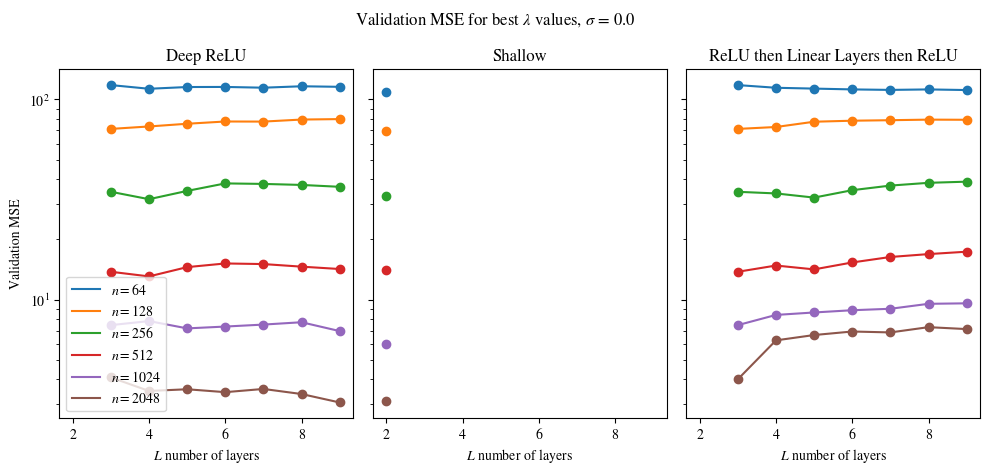

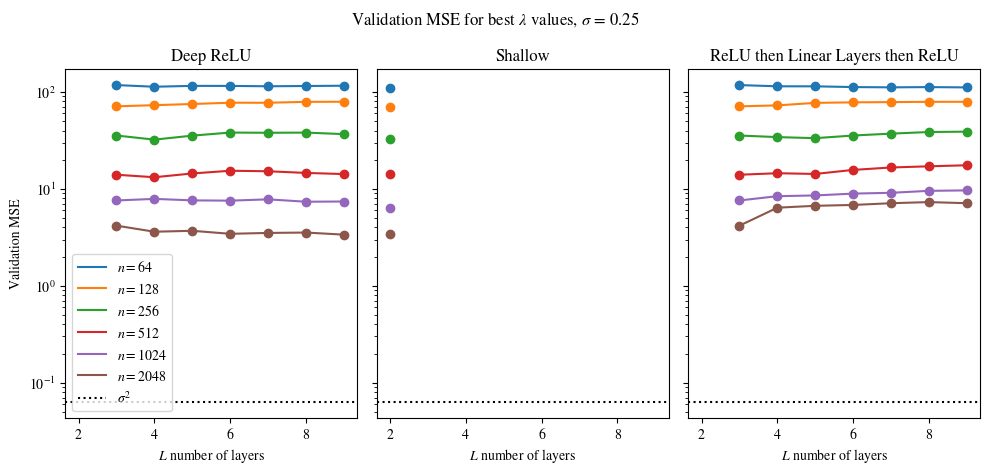

In [27]:
for std in res.sigma.unique():
    f, ax = plt.subplots(ncols=len(res.Activations.unique()),nrows=1, sharex=True, sharey=True, figsize=(10,4.8))
    for col,activation in enumerate(res.Activations.unique()):
        for n in res.n.unique():
                res_rnstd = res[(res.n == n) * (res["sigma"] == std) * (res.Activations == activation)]
                ax[col].scatter(res_rnstd.L,res_rnstd[["Validation MSE"]])
                ax[col].semilogy(res_rnstd.L,res_rnstd[["Validation MSE"]],label=rf"$n={n}$")
                for _,model in res_rnstd.iterrows():
                    text = rf'$\lambda = {model["lambda"]:.0e}$' + f'\nfit {model["Final Train MSE"]:.1e}\nwd{model["Final Weight Decay"]:.1e}'
        ax[col].set_xlabel("$L$ number of layers")
        ax[col].set_title(activation)
        if std > 0:
            ax[col].axhline(y=std**2, color='k', linestyle=':',label="$\sigma^2$")
        ax[0].set_ylabel("Validation MSE")
        f.suptitle(rf"Validation MSE for best $\lambda$ values, $\sigma$ = {std}")
    ax[0].legend()
    f.tight_layout()
    if int(std) == std:
        std = int(std)
    f.savefig("specialized_target_architecture_comparison"+f"_labelnoise{std}_ValidationMSE.pdf",dpi=300)
    plt.show()

## Performance metrics with/without linear layers

In [28]:
res.r.unique()

array([1])

In [29]:
res.Activations.unique()

array(['Deep ReLU', 'Shallow', 'ReLU then Linear Layers then ReLU'],
      dtype=object)

In [30]:
columnwidth = 6.17406722223
markersize = 4
colors = {  
    0   :"C0",
    0.25:"C1",
}
linestyles = {
    "Shallow":"-",
    "Linear Layers then ReLU":"--",
    'Deep ReLU':"-.",
    'ReLU then Linear Layers then ReLU':(0, (3, 1, 1, 1, 1, 1))
}
markers = {
    "Shallow":".",
    "Linear Layers then ReLU":"x",
    'Deep ReLU':"^",
    'ReLU then Linear Layers then ReLU':"v"
}

### generalization

(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)


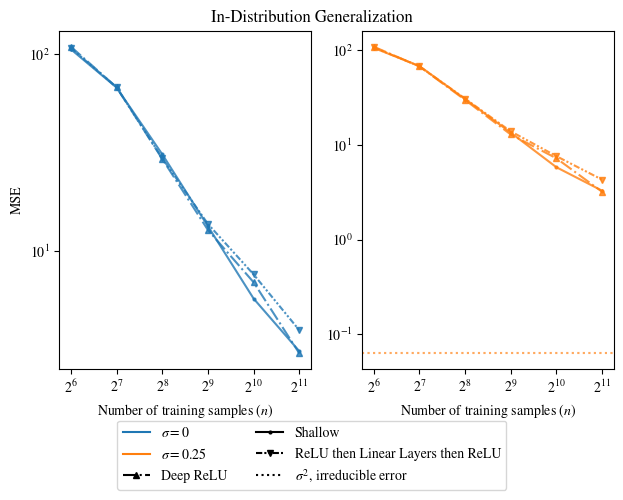

(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)
(6, 32)


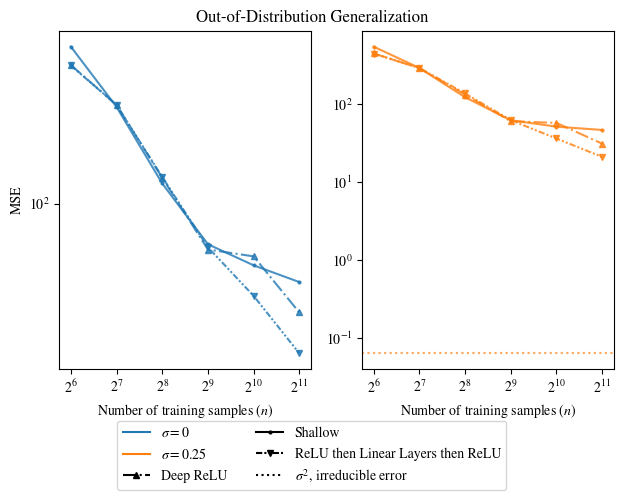

In [31]:
#generalization and OOD errors
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=linestyles[activation], label=activation, marker = markers[activation], markersize=markersize) for activation in res.Activations.unique()
] 
handles += [
        Line2D([0], [0], color='k', ls=':', label='$\sigma^2$, irreducible error'),
]

for metric in ['In-Distribution','Out-of-Distribution']:
    standard_errors = metric[:-3] + 'SEM'
    f, ax = plt.subplots(ncols=2,nrows=1, sharex=True, figsize=(columnwidth,4.25))
    #just the data without label noise in the first row
    for col,sigma in enumerate([0,0.25]):
        for activation in res.Activations.unique():
            curr = bestres[(bestres.Activations == activation) * (bestres.sigma == sigma)]
            print(curr.shape)
            points = curr[[metric + " MSE"]].values[:,0]
            ax[col].plot(curr.n,points,
                                linestyle=linestyles[activation],
                                marker=markers[activation],
                                markersize=markersize,
                                color=colors[sigma],
                                alpha=0.8)
            #horizontal dashed line for minimal possible MSE (ie sigma^2) in plots with label noise
            ax[1].axhline(y=sigma**2, color=colors[sigma], linestyle=':',alpha=0.3)
        #plot set up
        ax[col].set_xscale("log",base=2)
        ax[col].set_xticks([2**k for k in range(6,12)])
        ax[col].set_yscale("log",base=10)
        ax[0].set_ylabel(f"MSE",wrap=True)
        ax[col].set_xlabel("Number of training samples ($n$)")
        ax[col].minorticks_off()
    f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.03))
    plt.suptitle(f"{metric} Generalization")
    plt.tight_layout(pad=0.5,h_pad=1.08, w_pad=1.08)
    plt.savefig("specialized_target_architecture_comparison"+f"{metric} Generalization.pdf",dpi=300,bbox_inches='tight')
    plt.show()

## training

Deep ReLU 0.0 64
Shallow 0.0 64
ReLU then Linear Layers then ReLU 0.0 64
Deep ReLU 0.25 64
Shallow 0.25 64
ReLU then Linear Layers then ReLU 0.25 64
Deep ReLU 0.0 128
Shallow 0.0 128
ReLU then Linear Layers then ReLU 0.0 128
Deep ReLU 0.25 128
Shallow 0.25 128
ReLU then Linear Layers then ReLU 0.25 128
Deep ReLU 0.0 256
Shallow 0.0 256
ReLU then Linear Layers then ReLU 0.0 256
Deep ReLU 0.25 256
Shallow 0.25 256
ReLU then Linear Layers then ReLU 0.25 256
Deep ReLU 0.0 512
Shallow 0.0 512
ReLU then Linear Layers then ReLU 0.0 512
Deep ReLU 0.25 512
Shallow 0.25 512
ReLU then Linear Layers then ReLU 0.25 512
Deep ReLU 0.0 1024
Shallow 0.0 1024
ReLU then Linear Layers then ReLU 0.0 1024
Deep ReLU 0.25 1024
Shallow 0.25 1024
ReLU then Linear Layers then ReLU 0.25 1024
Deep ReLU 0.0 2048
Shallow 0.0 2048
ReLU then Linear Layers then ReLU 0.0 2048
Deep ReLU 0.25 2048
Shallow 0.25 2048
ReLU then Linear Layers then ReLU 0.25 2048


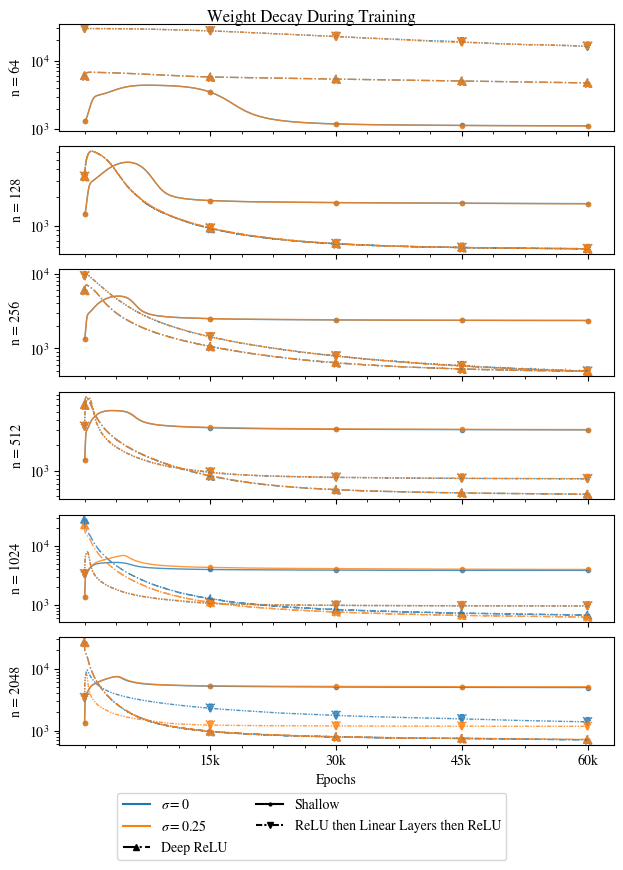

Deep ReLU 0.0 64
Shallow 0.0 64
ReLU then Linear Layers then ReLU 0.0 64
Deep ReLU 0.25 64
Shallow 0.25 64
ReLU then Linear Layers then ReLU 0.25 64
Deep ReLU 0.0 128
Shallow 0.0 128
ReLU then Linear Layers then ReLU 0.0 128
Deep ReLU 0.25 128
Shallow 0.25 128
ReLU then Linear Layers then ReLU 0.25 128
Deep ReLU 0.0 256
Shallow 0.0 256
ReLU then Linear Layers then ReLU 0.0 256
Deep ReLU 0.25 256
Shallow 0.25 256
ReLU then Linear Layers then ReLU 0.25 256
Deep ReLU 0.0 512
Shallow 0.0 512
ReLU then Linear Layers then ReLU 0.0 512
Deep ReLU 0.25 512
Shallow 0.25 512
ReLU then Linear Layers then ReLU 0.25 512
Deep ReLU 0.0 1024
Shallow 0.0 1024
ReLU then Linear Layers then ReLU 0.0 1024
Deep ReLU 0.25 1024
Shallow 0.25 1024
ReLU then Linear Layers then ReLU 0.25 1024
Deep ReLU 0.0 2048
Shallow 0.0 2048
ReLU then Linear Layers then ReLU 0.0 2048
Deep ReLU 0.25 2048
Shallow 0.25 2048
ReLU then Linear Layers then ReLU 0.25 2048


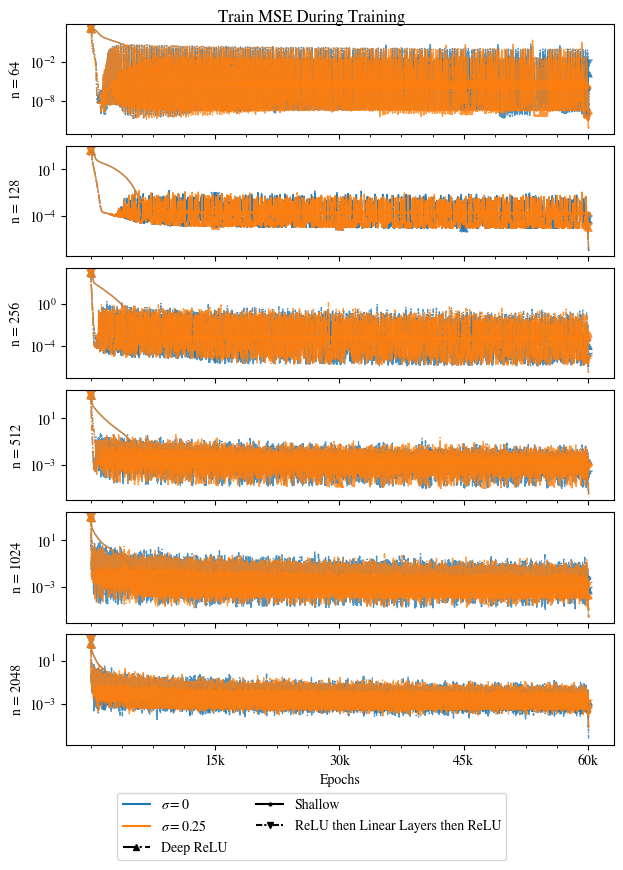

In [32]:
handles = [
    Line2D([0], [0], color=color, ls='-', label=rf"$\sigma =${sigma}") for sigma,color in colors.items()
]
handles += [
    Line2D([0], [0], color='k', ls=linestyles[activation], label=activation, marker = markers[activation], markersize=markersize) for activation in res.Activations.unique()
] 

#training time plot
for metric in ["Weight Decay","Train MSE"]:
    f, ax = plt.subplots(nrows=len(res.n.unique()), sharex=True, sharey=False, figsize=(columnwidth,8))
    for row,n in enumerate(res.n.unique()):
        for sigma in res.sigma.unique():
            for activation in res.Activations.unique():
                curr = bestres[(bestres.Activations == activation) * (bestres.sigma == sigma) * (bestres.n == n)]
                print(activation,sigma,n)
                assert curr[metric].shape[0] == 1 # make sure there's only one row
                values_to_plot = curr[metric].iloc[0]
                epochs = len(values_to_plot)
                ax[row].plot(np.arange(epochs),values_to_plot,
                                    linestyle=linestyles[activation],
                                    color=colors[sigma],
                                    linewidth = 1,
                                    alpha=0.8)
                ax[row].scatter(np.arange(epochs)[::15_000],values_to_plot[::15_000],
                                    linestyle=linestyles[activation],
                                    color=colors[sigma],
                                    marker=markers[activation],
                                    linewidth = 1,
                                    alpha=0.8)
            #plot set up
            ax[row].set_ylabel(f"n = {n}")
            ax[row].set_yscale("log",base=10)
            ax[row].minorticks_on()
            ax[-1].set_xlabel("Epochs")
            ticks = np.arange(15_000,epochs,step=15_000)
            ax[-1].set_xticks(ticks=ticks, labels=[str(t)[:-3]+'k' for t in ticks])
    f.legend(handles=handles, ncol=2, loc = 'upper center', bbox_to_anchor=(0.5,0.01))
    plt.suptitle(metric+" During Training")
    plt.tight_layout(pad=0.5,h_pad=0.5, w_pad=0.5)
    plt.savefig("specialized_target_architecture_comparison"+metric+"training.pdf",dpi=300,bbox_inches='tight')
    plt.show()